# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/users/mbowey/desktop/bootcamp/mlb_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
# YOUR CODE HERE!]
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63812.40
The current value of your 5.3 ETH is $13421.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2021-04-21 00:00:00-04:00  114.6  114.74  114.53  114.74  5250384  411.51   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-21 00:00:00-04:00  416.29  411.36  416.08  54772634

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.74
Current SPY closing price: $416.08


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20804.00
The current value of your 200 AGG shares is $22948.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!

# Assign current value amounts
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

savings_data = {
    "amount": [crypto_value, shares_value]
}

# Set the sectors
sector_value = ["crypto", "shares"]


df_savings = pd.DataFrame(savings_data, index=sector_value)

# Display savings DataFrame
display(df_savings)

,amount
crypto,77233.643
shares,43752.000


Text(0, 0.5, 'Amount')

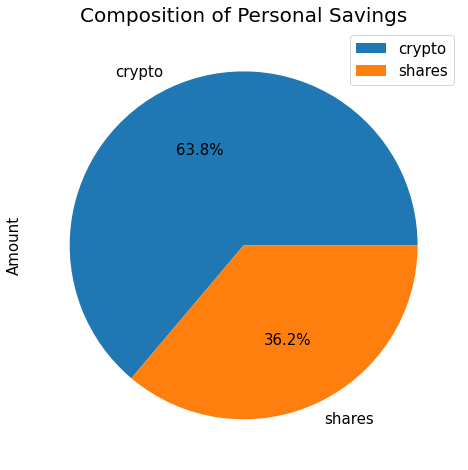

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind='pie', 
                subplots=True, 
                figsize=(8,8), 
                autopct='%1.1f%%', 
                fontsize=15,
)
 
plt.legend(loc=1, prop={'size':15})
plt.title('Composition of Personal Savings', fontsize=20)
plt.ylabel('Amount', fontsize=15)

In [13]:
# Set ideal emergency fund
emergency_fund = float(monthly_income * 3)


# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + shares_value

In [14]:
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"CONGRATULATIONS YOU HAVE ENOUGH MONEY IN THIS FUND!!!")
    
elif total_savings == emergency_fund:
    print(f"CONGRATULATIONS YOU HAVE REACHED YOUR FINANCIAL GOAL!!!")
    
else:
    print(f"YOU ARE {total_savings - emergency_fund} FROM REACHING YOUR GOAL!!")


CONGRATULATIONS YOU HAVE ENOUGH MONEY IN THIS FUND!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG","SPY",]

# Get 5 year's worth of historical price data
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_traditional_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_traditional_portfolio.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_traditional_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996258,0.993964,0.990581,0.995456,0.990101,0.984404,0.989231,1.000670,0.989595,0.992128,...,0.996065,1.004887,1.011113,0.998808,1.006449,1.005333,0.996801,0.995380,0.995178,0.998500
2,0.991189,0.983480,0.997619,0.996626,0.991347,0.978028,0.984437,0.999636,0.987718,0.997680,...,0.981678,0.999875,1.003881,0.997125,1.008365,1.004141,1.000569,0.999027,0.991778,0.993229
3,0.991388,0.996069,0.989388,0.995570,1.002860,0.969616,0.969084,1.017473,0.991113,1.000751,...,0.992756,1.002455,1.013011,0.997954,1.000818,0.994687,0.997844,0.997807,0.996880,1.004402
4,1.002508,1.005633,0.980784,0.989498,1.001670,0.980641,0.968698,1.015514,0.994849,1.005727,...,0.996428,1.002586,0.998737,0.981507,1.005170,0.990994,1.000762,0.993169,1.009772,1.002203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.677195,10.201445,10.414623,10.226261,5.889356,10.348251,7.303301,8.330214,7.058776,8.610835,...,2.585595,3.408014,7.479180,7.245119,6.875203,5.116430,7.213816,10.045120,14.749291,86.168942
7557,10.508623,10.331465,10.312939,10.329396,5.852926,10.351312,7.296408,8.391194,6.975303,8.606623,...,2.569984,3.412677,7.461631,7.305332,6.935254,5.137704,7.190685,10.095389,14.873669,84.956190
7558,10.513301,10.276807,10.340026,10.384900,5.862937,10.360436,7.212556,8.347606,6.990358,8.582196,...,2.549579,3.443634,7.463008,7.327605,7.060755,5.171120,7.121975,10.044085,14.729584,85.248363
7559,10.609903,10.418799,10.430462,10.530700,5.872374,10.360004,7.201686,8.280180,6.978009,8.626851,...,2.557242,3.413186,7.403870,7.334738,7.006999,5.249827,7.100459,10.052074,14.786854,84.447240


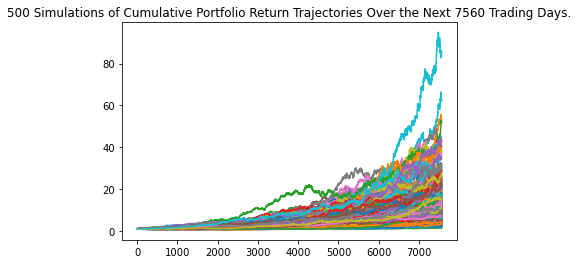

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_traditional_portfolio.plot_simulation()

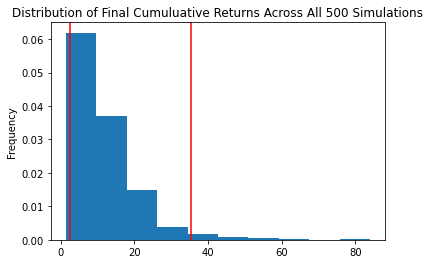

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_traditional_portfolio.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
traditional_tbl = MC_traditional_portfolio.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(traditional_tbl)

count           500.000000
mean             12.033431
std               8.983435
min               1.356749
25%               6.123797
50%               9.447741
75%              15.103953
max              84.019671
95% CI Lower      2.566162
95% CI Upper     35.349117
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51323.24 and $706982.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76984.87 and $1060473.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_traditional_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_traditional_five.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!


MC_traditional_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010178,1.004008,0.990181,0.999493,0.998767,1.000461,1.008256,0.990131,0.987141,1.002718,...,1.000185,0.999560,1.003296,0.997867,1.004733,0.997600,0.995213,0.988644,1.006019,1.002126
2,1.015660,1.006058,0.988663,0.999728,1.009748,0.993465,1.006448,1.007031,0.993574,0.997984,...,0.993823,0.998073,1.004684,0.993560,1.004177,0.985890,0.990337,0.980831,1.014734,1.006215
3,1.016874,1.008344,0.986401,0.988761,1.020786,0.984656,1.010016,1.013591,1.000623,0.996495,...,1.001522,1.005284,1.006433,0.994666,1.000540,0.981633,0.992964,0.978661,1.022216,1.008940
4,1.007733,1.005147,0.985121,0.986254,1.019833,0.982605,1.027840,1.012199,0.994444,1.006950,...,1.010807,1.009004,1.013901,0.986308,1.006879,0.983822,0.992025,0.979146,1.022216,1.019495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.298824,1.161609,1.477057,1.289978,1.299182,1.139172,1.353937,1.513000,1.749285,1.413406,...,0.940246,1.750620,1.594880,1.519038,1.237742,1.322573,2.130325,1.226681,1.175191,1.382036
1257,1.311775,1.171173,1.470541,1.291400,1.316323,1.132025,1.357069,1.524614,1.733926,1.411813,...,0.945161,1.757634,1.616842,1.506168,1.233365,1.329863,2.132306,1.223739,1.170168,1.395866
1258,1.325286,1.169087,1.460708,1.283770,1.291991,1.124786,1.372709,1.524743,1.718665,1.400324,...,0.958291,1.750507,1.604484,1.508642,1.225592,1.327511,2.116940,1.233301,1.165424,1.394466
1259,1.319997,1.157219,1.474780,1.278900,1.275397,1.114149,1.354183,1.524114,1.709940,1.412626,...,0.963112,1.759445,1.600334,1.489820,1.240263,1.329559,2.127957,1.233733,1.169590,1.385017


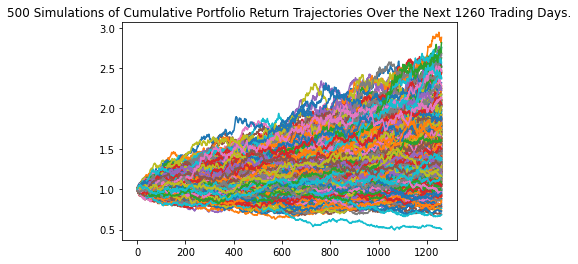

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_traditional_five.plot_simulation()

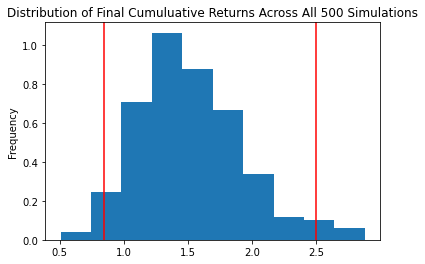

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_traditional_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_traditional_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.511589
std               0.410394
min               0.505392
25%               1.225992
50%               1.470917
75%               1.760336
max               2.879752
95% CI Lower      0.847993
95% CI Upper      2.498080
Name: 1260, dtype: float64


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16959.86 and $49961.6


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_traditional_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_traditional_ten.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_traditional_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005220,1.010253,1.008393,0.992705,0.993764,1.009144,1.015319,1.003683,0.998162,1.017221,...,1.005577,0.989278,0.998835,0.997499,1.003378,1.012498,0.988609,1.001283,0.997095,1.015267
2,1.017269,1.009082,1.007683,0.985249,1.002437,1.005754,1.005545,1.013209,1.001059,1.009967,...,1.010746,0.994133,0.991545,0.992981,1.013657,1.013477,0.988891,1.001890,0.991996,1.022190
3,1.028133,1.031742,1.007302,0.979805,0.993288,1.008781,1.010085,1.011874,0.994585,1.008918,...,1.013722,1.000950,0.994702,0.996200,0.999107,1.012090,0.995905,0.996124,0.977364,1.010110
4,1.019843,1.037405,1.001280,0.985948,0.989850,1.025264,1.007899,1.009033,0.990483,0.985890,...,1.005396,1.004023,1.004216,0.997620,1.002927,1.015200,0.993286,0.991645,0.971449,1.010411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.790441,1.997714,2.258625,2.546933,1.994479,2.865158,3.319921,2.564337,2.764660,4.359109,...,2.311891,2.075106,2.488957,2.205041,2.556698,2.906325,1.495519,1.689116,1.750610,3.312010
2517,1.781832,1.990136,2.263554,2.543663,2.004697,2.900027,3.283190,2.579897,2.742059,4.365069,...,2.323163,2.051201,2.504464,2.198372,2.538262,2.907733,1.491415,1.673760,1.771553,3.322477
2518,1.778964,1.978957,2.256535,2.554810,2.022794,2.885503,3.308900,2.595342,2.767178,4.366634,...,2.317549,2.059309,2.522994,2.206125,2.557621,2.916762,1.490896,1.662615,1.775304,3.352930
2519,1.777681,1.956584,2.244346,2.565338,2.009206,2.867686,3.314084,2.627219,2.793618,4.420178,...,2.324886,2.028023,2.581354,2.213519,2.531582,2.940376,1.480023,1.669839,1.767975,3.367491


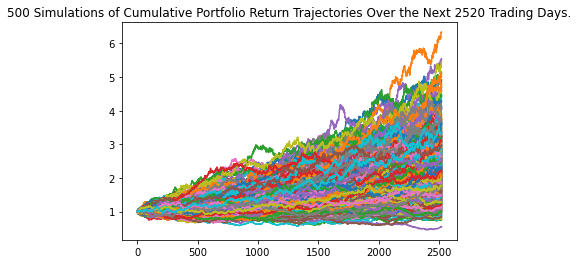

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_traditional_ten.plot_simulation()

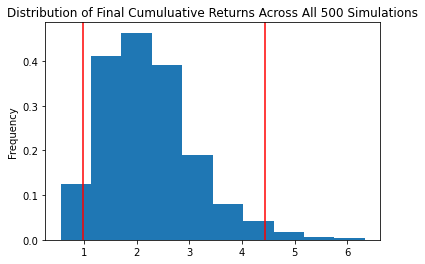

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_traditional_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_traditional_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              2.232939
std               0.866759
min               0.551779
25%               1.605604
50%               2.135768
75%               2.716041
max               6.333545
95% CI Lower      0.985819
95% CI Upper      4.428296
Name: 2520, dtype: float64


In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19716.37 and $88565.92
